## Importamos librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv

## Leemos el DATAFRAME que vamos a usar 

In [3]:
df_okCupid= pd.read_csv('/content/drive/MyDrive/Bedu/okcupid_profiles.csv')
df_okCupid.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


### Limpiamos el DF de nulos 

In [4]:
df_okCupid = df_okCupid.dropna(how='any')

### Se hace un Reindex

In [5]:
df_okCupid = df_okCupid.reset_index(drop=True)

## Tabla de Correlación de datos dentro del dataframe

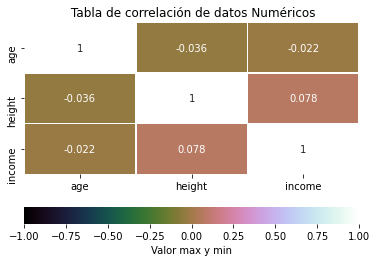

In [6]:
plt.figure(figsize=(6,4))
plt.title(' Tabla de correlación de datos Numéricos')


ax = sns.heatmap(df_okCupid.corr(), vmin=-1, vmax=1, annot=True, cmap='cubehelix', 
                 linewidths=.5, cbar_kws={'label': 'Valor max y min', 'orientation': 'horizontal'})

## Convertimos lo que tiene la columna de 'Sex' a un array

In [7]:
df_okCupid['sex'].unique()

array(['m', 'f'], dtype=object)

### Convertimos la columna 'sexo' en una categoría que sólo contiene:
* 'm' = masculino 
* 'f' = femenino

In [8]:
df_okCupid['sex'] = df_okCupid['sex'].astype('category')
df_okCupid['sex'].cat.set_categories(['m', 'f'], inplace=True)

### **Tabla pivote** que obtiene el **promedio del salario de cada sexo**, *en donde se ve que el hombre reciben en promedio un salario dos veces más alto*

In [9]:
sexo_pivote = pd.pivot_table(df_okCupid, index=df_okCupid.sex, values='income')
sexo_pivote

,income
sex,
m,41157.278543
f,17851.594734


### **Tabla pivote** en donde se obtiene el **promedio de la edad y el salario** con respecto a la *educación que tienen*

In [10]:
pivote_educ_age = pd.pivot_table(df_okCupid, index=df_okCupid.education, values=["age", "income"])
pivote_educ_age.head()

,age,income
education,,
college/university,36.255319,33190.787234
dropped out of college/university,34.016667,50582.858333
dropped out of high school,33.400000,158666.333333
dropped out of law school,27.500000,499999.500000
dropped out of masters program,39.888889,92221.833333


### **Tabla pivote** que obtiene promedio de la **edad, altura y salario** con respecto a la *educación y el sexo*

In [11]:
pivote_educ_age_sex = pd.pivot_table(df_okCupid, index=["education", "sex"])
pivote_educ_age_sex.head()

age     height         income
education                         sex                                     
college/university                m    38.833333  69.600000   41999.200000
                                  f    31.705882  64.647059   17646.529412
dropped out of college/university m    34.056818  70.613636   63181.352273
                                  f    33.906250  66.250000   15937.000000
dropped out of high school        m    32.333333  71.666667  106666.333333

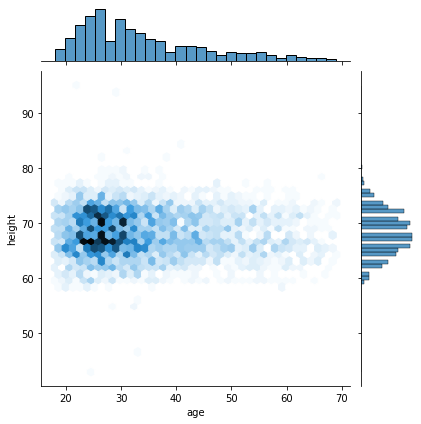

In [12]:
sns.jointplot(x=df_okCupid['age'], y=df_okCupid['height'], kind='hex');

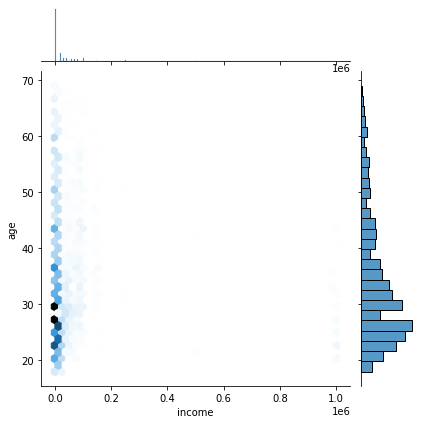

In [13]:
sns.jointplot(x=df_okCupid['income'], y=df_okCupid['age'], kind='hex');

### **Tabla pivote** que obtiene promedio del **salario** con respecto a los que *fuman y beben*

In [14]:
smoke_drinks_pivote = pd.pivot_table(df_okCupid, index=["smokes", "drinks"], values="income")
smoke_drinks_pivote.head(10)

income
smokes    drinks                    
no        desperately   75881.647059
          not at all    27142.151976
          often         30738.478261
          rarely        27474.670611
          socially      26774.811906
          very often   106666.095238
sometimes desperately   33333.000000
          not at all     8094.523810
          often         34443.800000
          rarely        49999.500000

### **Tabla pivote** para obtener el promedio de la **edad y salarios** con respecto a la *situación sentimental y sexo*

In [15]:
pvt_sex_st_ag_incm = pd.pivot_table(df_okCupid, index=["status", "sex"], values=["income", "age"], 
               fill_value=0, margins=True)
pvt_sex_st_ag_incm

age        income
status         sex                         
available      m    34.556701  32679.804124
               f    32.419355  15805.822581
married        m    36.300000  38999.600000
               f    31.600000   2999.100000
seeing someone m    31.064516  34999.500000
               f    27.931507  34108.849315
single         m    32.952195  41689.948718
               f    34.873884  17342.991629
All                 33.656229  30913.777400

### **Tabla pivote** para obtener el promedio de la **edad y salarios** con respecto a la *situación sentimentla y sexo*, se obtiene la media de la edad

In [16]:
pvt1 =pd.pivot_table(df_okCupid, index=["status", "sex"], values=["income", "age"],
               aggfunc={"income": np.mean, "age": np.median}, fill_value=0, margins=True)
pvt1

age        income
status         sex                    
available      m    32.0  32679.804124
               f    30.0  15805.822581
married        m    35.5  38999.600000
               f    30.0   2999.100000
seeing someone m    29.0  34999.500000
               f    27.0  34108.849315
single         m    30.0  41689.948718
               f    32.0  17342.991629
All                 30.0  30913.777400

In [17]:
age = df_okCupid['age']

means = []

for i in range(100000):
    sample = age.sample(n=5, replace=True)
    means.append(sample.mean())
    
serie_means1 = pd.Series(means)

In [18]:
print(f'Error estandar: {serie_means1.std()}')

Error estandar: 5.003261095623532


In [19]:
print(f'Valor mínimo: {serie_means1.min()}')
print(f'Valor máximo: {serie_means1.max()}')
print(f'Rango: {serie_means1.max() - serie_means1.min()}')

Valor mínimo: 20.6
Valor máximo: 59.2
Rango: 38.6


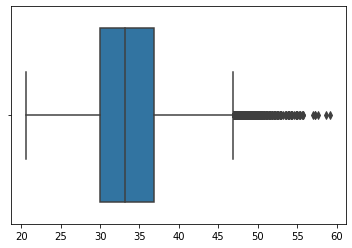

In [20]:
sns.boxplot(x=serie_means1);

In [21]:
limite_inferior = serie_means1.quantile(0.025)
limite_superior = serie_means1.quantile(0.975)

In [22]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {age.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 25.2 < 33.65622872702519 < 44.6


In [23]:
mean_of_intervals = ((age.mean() - limite_inferior) + (limite_superior - age.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {age.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 33.65622872702519 +/- 9.700000000000001


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


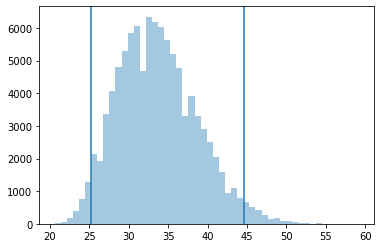

In [24]:
sns.distplot(serie_means1, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

In [25]:
serie_means1.skew()

0.45550890543945033

### **Tabla pivote** para obtener el promedio de los **salarios** y la media de la **edad** de cada **orientación sexual**,  con respecto a la *situación sentimentla y sexo*

In [26]:
table=pd.pivot_table(df_okCupid, index=["status", "sex"], values=["income", "age"],
               columns="orientation",aggfunc={"income": np.mean, "age": np.median}, 
               fill_value=0, margins=True)

table

age        ...        income              
orientation        bisexual   gay  ...      straight           All
status         sex                 ...                            
available      m       37.0  24.0  ...  36922.500000  32679.804124
               f       30.0  30.5  ...  15262.473684  15805.822581
married        m       43.0  30.0  ...  41249.625000  38999.600000
               f       28.5  31.0  ...   5999.200000   2999.100000
seeing someone m       27.0  28.0  ...  36980.641509  34999.500000
               f       26.0  28.0  ...  44799.220000  34108.849315
single         m       26.0  30.0  ...  42004.241748  41689.948718
               f       25.0  29.0  ...  17338.151418  17342.991629
All                    26.0  30.0  ...  31677.756601  30913.777400

[9 rows x 8 columns]

## **Gráfica** del *salario* que obtienen con respecto a la *edad*

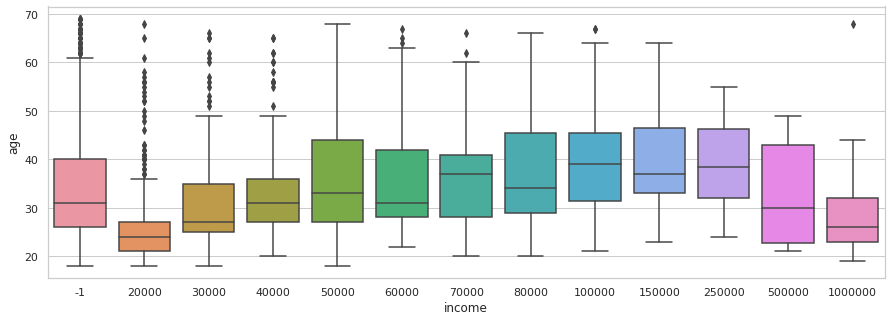

In [27]:
plt.figure(figsize=(15, 5))

sns.set_theme(style="whitegrid")

sns.boxplot(x=df_okCupid['income'], y=df_okCupid['age'])

## Porcentaje de personas dentro de la APP

### Agrupamiento de personas por **situación sentimental**

In [28]:
df_okCupid_estado=(df_okCupid.groupby("status") [["sex"]].count())

In [29]:
df_okCupid_estado["% de participantes"]=(df_okCupid_estado["sex"]/df_okCupid_estado["sex"].sum())*100
df_okCupid_estado = df_okCupid_estado.rename(columns= {"sex":"# de participantes"})
df_okCupid_estado

,# de participantes,% de participantes
status,,
available,159,3.607897
married,20,0.453823
seeing someone,135,3.063308
single,4093,92.874972


### Agrupamiento de personas por **orientación sexual**

In [30]:
df_okCupid_orientacion = (df_okCupid.groupby("orientation")
    [["sex"]].count().sort_values(by="sex", ascending=False))

In [31]:
df_okCupid_orientacion["% de participantes"]=(df_okCupid_orientacion["sex"]/df_okCupid_orientacion["sex"].sum())*100
df_okCupid_orientacion = df_okCupid_orientacion.rename(columns= {"sex":"# de participants"})
df_okCupid_orientacion

,# de participants,% de participantes
orientation,,
straight,3825,86.793737
gay,308,6.988881
bisexual,274,6.217381


### Agrupamiento de personas por **tipo de cuerpo**

In [32]:
df_okCupid_cuerpo=(df_okCupid.groupby("body_type")[["sex"]].count()
  .sort_values(by="sex", ascending=False))

In [33]:
df_okCupid_cuerpo["% de participantes"]=(df_okCupid_cuerpo["sex"]/df_okCupid_cuerpo["sex"].sum())*100
df_okCupid_cuerpo = df_okCupid_cuerpo.rename(columns= {"sex":"# de participantes"})
df_okCupid_cuerpo.head()

,# de participantes,% de participantes
body_type,,
average,1207,27.388246
fit,906,20.558203
athletic,799,18.130247
curvy,448,10.165646
thin,348,7.896528


### Agrupamiento de personas por **si realizan dieta**

In [34]:
df_okCupid_dieta=(df_okCupid.groupby("diet")[["sex"]].count()
 .sort_values(by="sex", ascending=False))

In [35]:
df_okCupid_dieta["% de participantes"]=(df_okCupid_dieta["sex"]/df_okCupid_dieta["sex"].sum())*100
df_okCupid_dieta = df_okCupid_dieta.rename(columns= {"sex":"# de participantes"})
df_okCupid_dieta.head()

,# de participantes,% de participantes
diet,,
mostly anything,2257,51.213978
strictly anything,636,14.431586
anything,522,11.844792
mostly vegetarian,441,10.006807
mostly other,155,3.517132


### Agrupamiento de personas por **si consumen alcohol**

In [36]:
df_okCupid_bebe = (df_okCupid.groupby("drinks")[["sex"]].count()
 .sort_values(by="sex", ascending=False))

In [37]:
df_okCupid_bebe["% de participantes"]=(df_okCupid_bebe["sex"]/df_okCupid_bebe["sex"].sum())*100
df_okCupid_bebe=df_okCupid_bebe.rename(columns= {"sex":"# de participantes"})
df_okCupid_bebe.head()

,# de participantes,% de participantes
drinks,,
socially,2958,67.120490
rarely,581,13.183572
often,396,8.985705
not at all,386,8.758793
very often,52,1.179941


### Agrupamiento de personas por **si consumen drogas**

In [38]:
df_okCupid_droga = (df_okCupid.groupby("drugs") [["sex"]].count()
 .sort_values(by="sex", ascending=False))

In [39]:
df_okCupid_droga["% de participantes"]=(df_okCupid_droga["sex"]/df_okCupid_droga["sex"].sum())*100
df_okCupid_droga = df_okCupid_droga.rename(columns= {"sex":"# de participantes"})
df_okCupid_droga

,# de participantes,% de participantes
drugs,,
never,3423,77.671886
sometimes,916,20.785115
often,68,1.543000


### Agrupamiento de personas por **su educación**

In [40]:
df_okCupid_educacion = (df_okCupid.groupby("education")[["sex"]].count()
 .sort_values(by="sex", ascending=False))

In [41]:
df_okCupid_educacion["% de participantes"]=(df_okCupid_educacion["sex"]/df_okCupid_educacion["sex"].sum())*100
df_okCupid_educacion = df_okCupid_educacion.rename(columns= {"sex":"# de participantes"})
df_okCupid_educacion.head()

,# de participantes,% de participantes
education,,
graduated from college/university,1739,39.459950
graduated from masters program,699,15.861130
working on college/university,572,12.979351
graduated from two-year college,184,4.175176
graduated from high school,170,3.857499


### Agrupamiento de personas por **su altura**

In [42]:
df_okCupid_altura=(df_okCupid.groupby("height") [["sex"]].count()
 .sort_values(by="sex", ascending=False))

In [43]:
df_okCupid_altura["% de participantes"]=(df_okCupid_altura["sex"]/df_okCupid_altura["sex"].sum())*100
df_okCupid_altura = df_okCupid_altura.rename(columns= {"sex":"# de participantes"})
df_okCupid_altura.head()

,# de participantes,% de participantes
height,,
68.0,412,9.348763
67.0,412,9.348763
70.0,401,9.099160
66.0,396,8.985705
69.0,374,8.486499


### Agrupamiento de personas por **su sexo**

In [44]:
df_okCupid_genero = (df_okCupid.groupby("sex") [["age"]].count())

In [45]:
df_okCupid_genero["% de participantes"]=(df_okCupid_genero["age"]/df_okCupid_genero["age"].sum())*100
df_okCupid_genero = df_okCupid_genero.rename(columns= {"age":"# de participantes"})
df_okCupid_genero

,# de participantes,% de participantes
sex,,
m,2470,56.047198
f,1937,43.952802


## Cambiamos nombre de la columna **"essay0"** y concatenamos columnas de **"essay"**

In [46]:
df_okCupid["Sobre mi"] = (df_okCupid["essay0"].str
    .cat(df_okCupid.iloc[:,22:-1].astype(str), sep=" "))

df_okCupid=df_okCupid.drop(df_okCupid.iloc[:,21:-1], axis=1)

### Se obtiene una sola columna de la concatenación llamada **"Sobre mí"**

In [47]:
df_okCupid.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,Sobre mi
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,33,single,m,straight,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,-1,science / tech / engineering,2012-06-27-21-41,"san francisco, california",doesn't have kids,likes dogs and likes cats,catholicism but not too serious about it,pisces and it&rsquo;s fun to think about,no,english (fluently),i relocated to san francisco half a year ago. ...
2,30,single,m,straight,fit,mostly anything,socially,never,graduated from college/university,white,69.0,-1,executive / management,2012-06-28-15-22,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and somewhat serious about it,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",i tend to think the same way a comedian does a...
3,29,single,m,straight,fit,mostly anything,socially,sometimes,graduated from college/university,white,67.0,40000,artistic / musical / writer,2012-05-28-15-18,"san francisco, california",doesn't want kids,likes dogs and likes cats,agnosticism and very serious about it,libra,no,english (fluently),"my names josh, and i create art for a living. ..."
4,31,single,f,straight,curvy,anything,socially,sometimes,graduated from masters program,white,66.0,-1,executive / management,2012-06-29-06-59,"san francisco, california","doesn't have kids, but might want them",likes dogs,atheism,pisces,no,english (fluently),one day i will mod r/hotchickswithspreadsheets...


### Buscamos el procentaje y cantidad de personas que en la columna **"Sobre mí"** colocaron las siguientes palabras: 

* **"Amor"**
* **"Relación"**
* **"Relación Seria"**
* **"Sólo un rato (pasión)"**
* **"Amistad"**

#### Búsqueda de la palabra **"Amor"**

In [48]:
Love = df_okCupid[df_okCupid['Sobre mi'].str.contains('love')]

df_searchLove = Love.groupby('sex') [['sex']].count()

df_searchLove["%"]=(df_searchLove["sex"]/df_searchLove["sex"].sum())*100
df_searchLove

,sex,%
sex,,
m,1832,51.736798
f,1709,48.263202


#### Búsqueda de la palabra **"Relación"**

In [49]:
relacion = df_okCupid[df_okCupid["Sobre mi"].str.contains("relationship")]

df_searchRela=(relacion.groupby("sex") [["sex"]].count())

df_searchRela["%"]=(df_searchRela["sex"]/df_searchRela["sex"].sum())*100
df_searchRela

,sex,%
sex,,
m,359,48.252688
f,385,51.747312


#### Búsqueda de las palabras **"Relación seria"**

In [50]:
relacion_seria = df_okCupid[df_okCupid["Sobre mi"].str.contains("serious relationship")]

df_searchRelSeria = (relacion_seria.groupby("sex") [["sex"]].count())
df_searchRelSeria["%"]=(df_searchRelSeria["sex"]/df_searchRelSeria["sex"].sum())*100
df_searchRelSeria

,sex,%
sex,,
m,10,50.0
f,10,50.0


#### Búsqueda de la palabra **"Pasión"**

In [51]:
pasion =df_okCupid[df_okCupid["Sobre mi"].str.contains("passion")]

df_searchPassion = (pasion.groupby("sex") [["sex"]].count())

df_searchPassion["%"]=(df_searchPassion["sex"]/df_searchPassion["sex"].sum())*100
df_searchPassion

,sex,%
sex,,
m,513,51.197605
f,489,48.802395


#### Búsqueda de la palabra **"Amistad"**

In [53]:
amistad =df_okCupid[df_okCupid["Sobre mi"].str.contains("friendship")]

df_searchFriendship = (amistad.groupby("sex") [["sex"]].count())

df_searchFriendship["%"]=(df_searchFriendship["sex"]/df_searchFriendship["sex"].sum())*100
df_searchFriendship

,sex,%
sex,,
m,107,42.629482
f,144,57.370518


## Primero, retomaremos nuestro dataset de Speed dating limpiado el módulo pasado para obtener datos de él. Hay que recordar el propóósito del estudio de este dataset, que es: **¿Cómo llegar a tener un segunda cita?**

In [61]:
speed_dating = pd.read_csv('/content/drive/MyDrive/Bedu/Fase3/speed_dating_clean.csv')

In [60]:
speed_dating.columns

Index(['Unnamed: 0', 'has_null', 'wave', 'gender', 'age', 'age_o', 'd_age',
       'race', 'same_race', 'importance_same_race', 'importance_same_religion',
       'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intelligence_important', 'funny_important', 'ambition_important',
       'shared_interests_important', 'attractive', 'sincere', 'intelligence',
       'funny', 'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'e

In [62]:
speed_dating.drop(['Unnamed: 0'],axis=1, inplace=True)

In [64]:
speed_dating.head()

,has_null,wave,gender,age,age_o,d_age,race,same_race,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,asian/pacific islander/asian-american,0,2.0,4.0,law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,1,0,0
1,0,1,female,21.0,22.0,1,asian/pacific islander/asian-american,0,2.0,4.0,law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,1,0,0
2,0,1,female,21.0,23.0,2,asian/pacific islander/asian-american,0,2.0,4.0,law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1,1,1
3,0,1,female,21.0,24.0,3,asian/pacific islander/asian-american,0,2.0,4.0,law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1,1,1
4,0,1,female,21.0,25.0,4,asian/pacific islander/asian-american,0,2.0,4.0,law,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.25,3.0,2.0,4.0,6.0,5.0,0.0,0,1,0


In [65]:
pd.set_option('display.max_columns', 67)
pd.set_option('display.max_rows', 67)

In [66]:
from scipy import stats

In [67]:
female = speed_dating['gender'] == 'female'
male = speed_dating['gender'] == 'male'

In [68]:
speed_dating_female = speed_dating[female]
speed_dating_male = speed_dating[male]

In [69]:
print('Edad de las mujeres')
print(f'Promedio: {speed_dating_female["age"].mean()}')
print(f'Media truncada: {stats.trim_mean(speed_dating_female["age"], 0.1)}')
print(f'Valor mínimo: {speed_dating_female["age"].min()}')
print(f'Percentil 10: {speed_dating_female["age"].quantile(0.1)}')
print(f'Percentil 25: {speed_dating_female["age"].quantile(0.25)}')
print(f'Percentil 50: {speed_dating_female["age"].median()}')
print(f'Percentil 75: {speed_dating_female["age"].quantile(0.75)}')
print(f'Percentil 90: {speed_dating_female["age"].quantile(0.9)}')
print(f'Valor máximo: {speed_dating_female["age"].max()}')
print(f'Desviación Estándar: {speed_dating_female["age"].std()}')
print(f'Rango: {speed_dating_female["age"].max()-speed_dating_female["age"].min()}')
print(f'Rango intercuartílico: {speed_dating_female["age"].quantile(0.75)-speed_dating_female["age"].quantile(0.25)}')

Edad de las mujeres
Promedio: 24.85687382297552
Media truncada: 24.49411764705882
Valor mínimo: 19.0
Percentil 10: 21.0
Percentil 25: 22.0
Percentil 50: 24.0
Percentil 75: 27.0
Percentil 90: 30.0
Valor máximo: 35.0
Desviación Estándar: 3.445292771891715
Rango: 16.0
Rango intercuartílico: 5.0


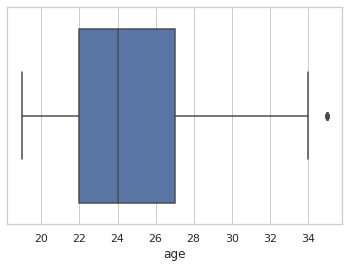

In [70]:
sns.set(style="whitegrid")
sns.boxplot(x=speed_dating_female["age"])

In [71]:
print('Edad de los hombres')
print(f'Promedio: {speed_dating_male["age"].mean()}')
print(f'Media truncada: {stats.trim_mean(speed_dating_male["age"], 0.1)}')
print(f'Valor mínimo: {speed_dating_male["age"].min()}')
print(f'Percentil 10: {speed_dating_male["age"].quantile(0.1)}')
print(f'Percentil 25: {speed_dating_male["age"].quantile(0.25)}')
print(f'Percentil 50: {speed_dating_male["age"].median()}')
print(f'Percentil 75: {speed_dating_male["age"].quantile(0.75)}')
print(f'Percentil 90: {speed_dating_male["age"].quantile(0.9)}')
print(f'Valor máximo: {speed_dating_male["age"].max()}')
print(f'Desviación Estándar: {speed_dating_male["age"].std()}')
print(f'Rango: {speed_dating_male["age"].max()-speed_dating_male["age"].min()}')
print(f'Rango intercuartílico: {speed_dating_male["age"].quantile(0.75)-speed_dating_male["age"].quantile(0.25)}')

Edad de los hombres
Promedio: 25.158607350096712
Media truncada: 25.079518072289158
Valor mínimo: 18.0
Percentil 10: 22.0
Percentil 25: 22.0
Percentil 50: 25.0
Percentil 75: 28.0
Percentil 90: 30.0
Valor máximo: 32.0
Desviación Estándar: 3.076226104988979
Rango: 14.0
Rango intercuartílico: 6.0


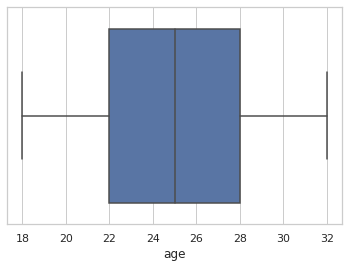

In [72]:
sns.set(style="whitegrid")
sns.boxplot(x=speed_dating_male["age"])

Ahora observamos una tabla de frecuencias y su representacióón gráfica, un histograma.

In [73]:
age_female = speed_dating_female['age']
pd.cut(age_female, 5)

0      (18.984, 22.2]
1      (18.984, 22.2]
2      (18.984, 22.2]
3      (18.984, 22.2]
4      (18.984, 22.2]
            ...      
981    (18.984, 22.2]
982    (18.984, 22.2]
983    (18.984, 22.2]
984    (18.984, 22.2]
985    (18.984, 22.2]
Name: age, Length: 531, dtype: category
Categories (5, interval[float64]): [(18.984, 22.2] < (22.2, 25.4] < (25.4, 28.6] < (28.6, 31.8] <
                                    (31.8, 35.0]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


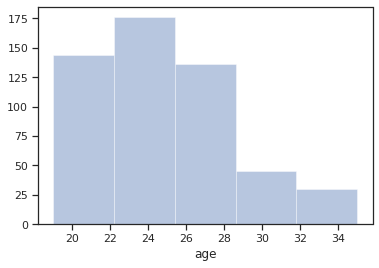

In [74]:
sns.set(style='ticks')
sns.distplot(age_female, kde=False, norm_hist=False, bins=5)

In [75]:
age_male = speed_dating_male['age']
pd.cut(age_male, 5)

58        (26.4, 29.2]
59        (26.4, 29.2]
60        (26.4, 29.2]
61        (26.4, 29.2]
62        (26.4, 29.2]
             ...      
1043    (17.986, 20.8]
1044    (17.986, 20.8]
1045    (17.986, 20.8]
1046    (17.986, 20.8]
1047    (17.986, 20.8]
Name: age, Length: 517, dtype: category
Categories (5, interval[float64]): [(17.986, 20.8] < (20.8, 23.6] < (23.6, 26.4] < (26.4, 29.2] <
                                    (29.2, 32.0]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


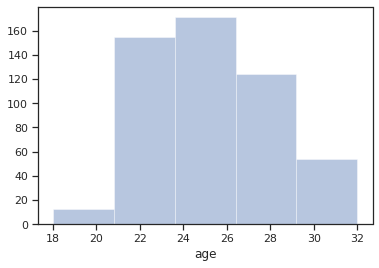

In [76]:
sns.set(style='ticks')
sns.distplot(age_male, kde=False, norm_hist=False, bins=5)

Se puede observar que muy pocos hombres son menores a 21 años, en comparacióón con las mujeres.
Otra forma de observar la distribución de los datos es con un violin plot.

Text(0.5, 1.0, 'Distribución de edades de mujeres')

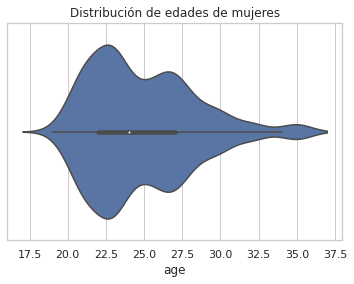

In [77]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=speed_dating_female["age"])
ax.set_title('Distribución de edades de mujeres')

Text(0.5, 1.0, 'Distribución de edades de hombres')

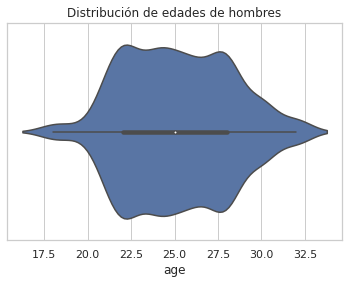

In [78]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=speed_dating_male["age"])
ax.set_title('Distribución de edades de hombres')

Ahora veremos la coorelación con los atributos numéricos




In [79]:
df = speed_dating.filter(items=['age', 'same_race','importance_same_race','importance_same_religion',
                                'attractive_important', 	'sincere_important', 	'intelligence_important',
                                'funny_important', 	'ambition_important', 	'shared_interests_important',
                                'attractive','sincere', 'intelligence','funny','ambition','attractive_partner',	
                                'sincere_partner', 	'intelligence_partner', 	'funny_partner', 	'ambition_partner', 	
                                'shared_interests_partner','like','met','decision','match'])
df.head()

,age,same_race,importance_same_race,importance_same_religion,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,like,met,decision,match
0,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,0.0,1,0
1,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,1.0,1,0
2,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,0.0,1,1
3,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,0.0,1,1
4,21.0,0,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,0.0,0,0


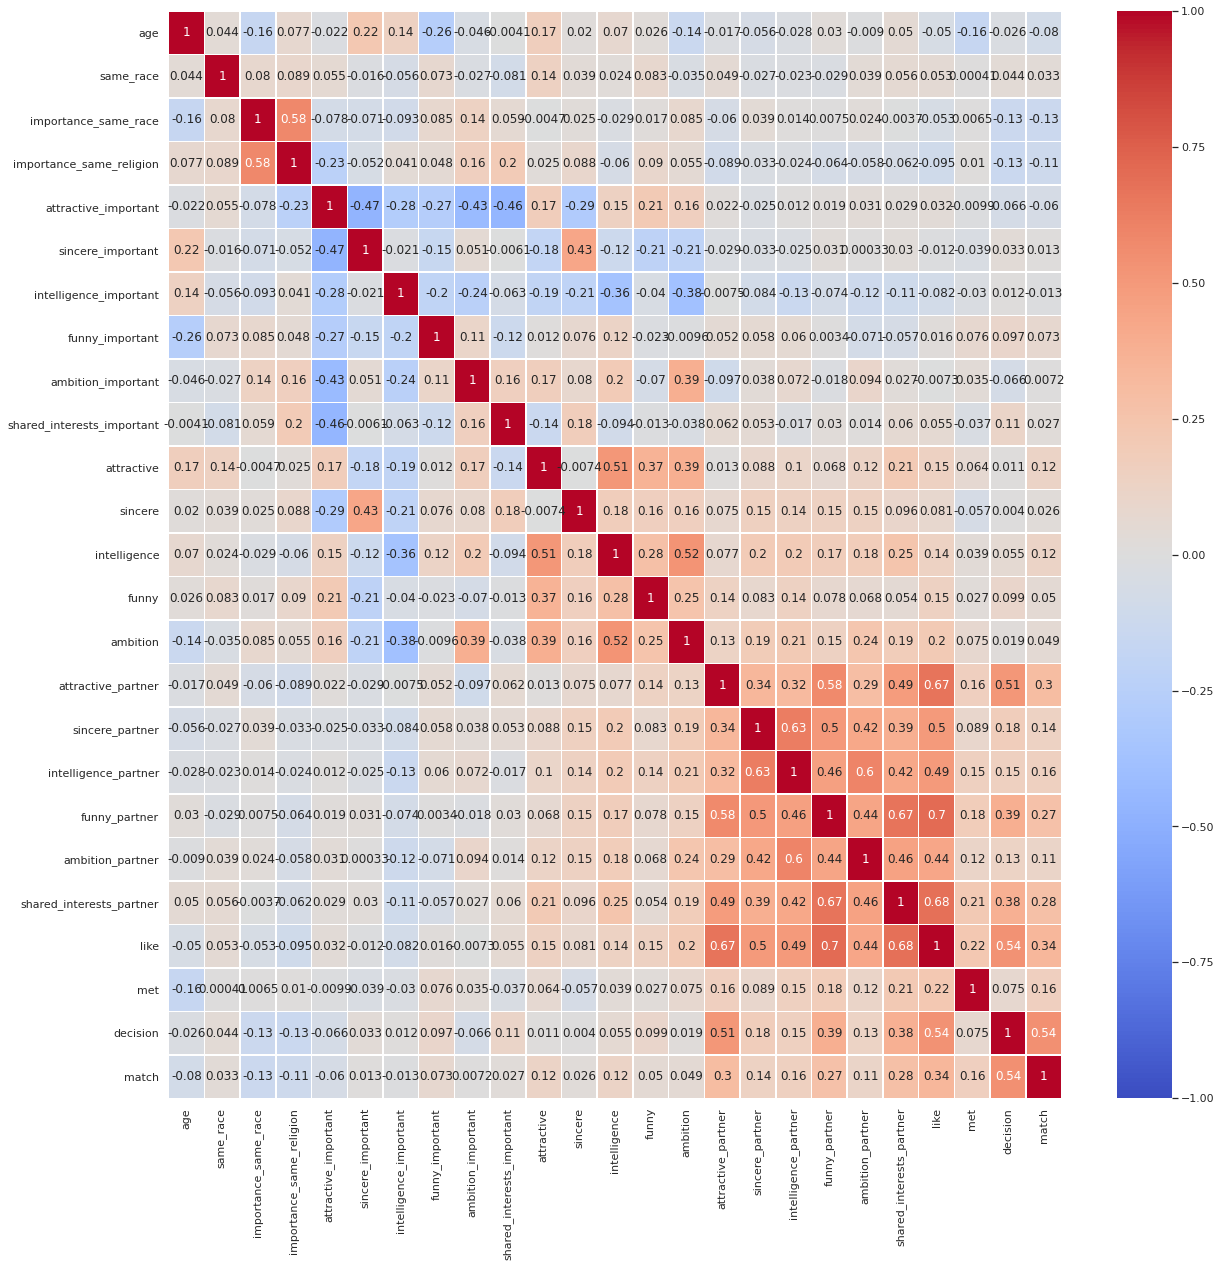

In [80]:
plt.figure(figsize=(20, 20))
sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=.5);

Ahora analicemos específicamente la impresión de la pareja con si se gustaron o juntaron.

In [81]:
df_att = speed_dating.filter(items=['attractive_partner',	'sincere_partner', 	'intelligence_partner',
                                    'funny_partner', 	'ambition_partner','shared_interests_partner',
                                    'like','met','decision','match'])

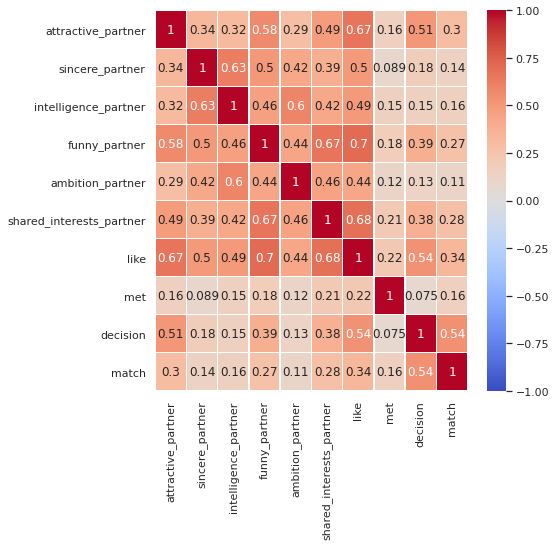

In [82]:
plt.figure(figsize=(7, 7))
sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(df_att.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=.5);

Comparamos por genero

In [83]:
df_att_f = speed_dating_female.filter(items=['attractive_partner',	'sincere_partner', 	'intelligence_partner',
                                    'funny_partner', 	'ambition_partner','shared_interests_partner',
                                    'like','met','decision','match'])

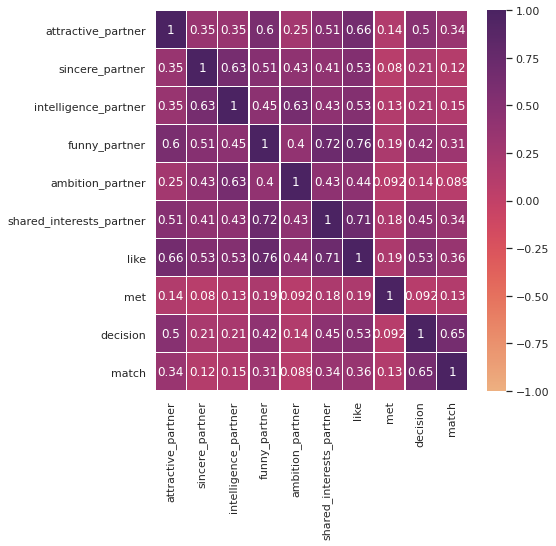

In [84]:
plt.figure(figsize=(7, 7))
sns.color_palette("flare", as_cmap=True)
ax = sns.heatmap(df_att_f.corr(), vmin=-1, vmax=1, annot=True, cmap="flare", linewidths=.5);

In [85]:
df_att_m = speed_dating_male.filter(items=['attractive_partner',	'sincere_partner', 	'intelligence_partner',
                                    'funny_partner', 	'ambition_partner','shared_interests_partner',
                                    'like','met','decision','match'])

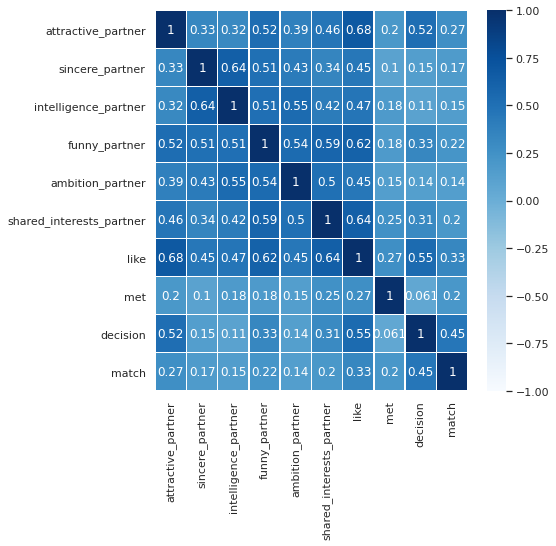

In [86]:
plt.figure(figsize=(7, 7))
sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(df_att_m.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues", linewidths=.5);

##Regresión Lineal
¿Te ha pasado que no entiendes por qué te gusta una persona?

Es perfectamente normal y a todos nos ha pasado al menos una vez.

El amor y el por qué nos enamoramos es uno de los fenómenos más difíciles de explicar de la vida del hombre, pero eso no nos detendrá en nuestro intento de descifrar este fenómeno. 

In [87]:
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


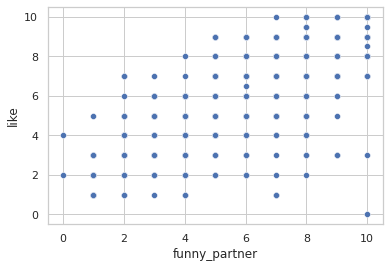

In [88]:
sns.scatterplot(speed_dating['funny_partner'], speed_dating['like']);

In [89]:
speed_dating['funny_partner'].corr(speed_dating['like'])

0.7035060413348618

In [90]:
lr = LinearRegression()

lr.fit(speed_dating['funny_partner'].to_frame(), speed_dating['like'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_predict = lr.predict(speed_dating['funny_partner'].to_frame())

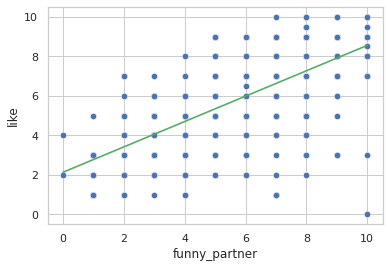

In [92]:
sns.scatterplot(x=speed_dating['funny_partner'], y=speed_dating['like'], s=40);
sns.lineplot(x=speed_dating['funny_partner'], y=y_predict, color='g');

In [93]:
lr.score(speed_dating['funny_partner'].to_frame(), 
         speed_dating['like'])

0.4949207501946504

Ahora se verá que tanto afecta atractivo en gustarle a alguien.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


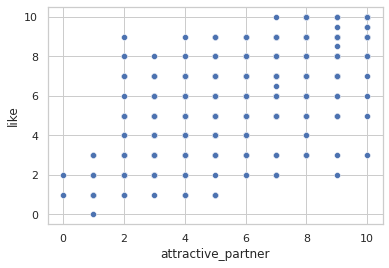

In [94]:
sns.scatterplot(speed_dating['attractive_partner'], speed_dating['like']);

In [95]:
speed_dating['attractive_partner'].corr(speed_dating['like'])

0.6689934052032851

In [96]:
lr_1 = LinearRegression()

lr_1.fit(speed_dating['attractive_partner'].to_frame(), speed_dating['like'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
y_predict_1 = lr_1.predict(speed_dating['attractive_partner'].to_frame())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


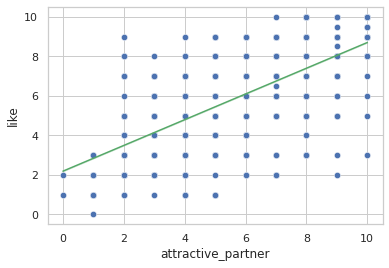

In [98]:
sns.scatterplot(speed_dating['attractive_partner'], speed_dating['like'], s=40);
sns.lineplot(speed_dating['attractive_partner'], y_predict_1, color='g');

In [99]:
lr_1.score(speed_dating['attractive_partner'].to_frame(), speed_dating['like'])

0.4475521762054872

Por último, los intereses en común

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


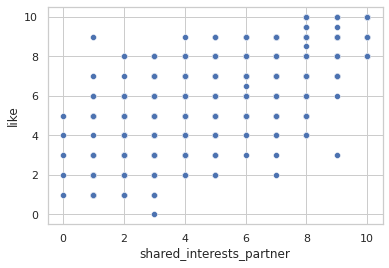

In [100]:
sns.scatterplot(speed_dating['shared_interests_partner'], speed_dating['like']);

In [101]:
speed_dating['shared_interests_partner'].corr(speed_dating['like'])

0.6825963041191665

In [102]:
lr_2 = LinearRegression()

lr_2.fit(speed_dating['shared_interests_partner'].to_frame(), speed_dating['like'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_predict_2 = lr_2.predict(speed_dating['shared_interests_partner'].to_frame())

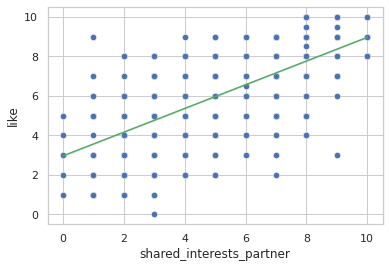

In [104]:
sns.scatterplot(x=speed_dating['shared_interests_partner'], y=speed_dating['like'], s=40);
sns.lineplot(x=speed_dating['shared_interests_partner'], y=y_predict_2, color='g');

In [105]:
lr_2.score(speed_dating['shared_interests_partner'].to_frame(),
           speed_dating['like'])

0.4659377143971465

Los modelos obtenidos no son ni tan buenos ni tan malos, habrá que tomar más valores en cuenta para estudiar este fenómeno. Esperamos poder lograrlo en el siguiente módulo de Machine Learning.

## ¿Dónde debemos empezar a buscar una pareja?

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/miguelmontcerv/Bedu_Fase_2/main/DS-R/Proyecto_R/proyectoShinyWeb/datosINEGI.csv',index_col=0, encoding="ISO-8859-1")

In [108]:
df.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,X2015,X2020
1,1,Aguascalientes,0,Estatal,6207019011,Porcentaje de la población de 12 años y más so...,36.809400,36.031446
2,1,Aguascalientes,1,Aguascalientes,6207019011,Porcentaje de la población de 12 años y más so...,37.377477,36.701454
3,1,Aguascalientes,2,Asientos,6207019011,Porcentaje de la población de 12 años y más so...,34.839030,33.967030
4,1,Aguascalientes,3,Calvillo,6207019011,Porcentaje de la población de 12 años y más so...,37.038965,35.387914
5,1,Aguascalientes,4,Cosío,6207019011,Porcentaje de la población de 12 años y más so...,33.708254,31.770671


In [109]:
df['estado'] = df['desc_entidad']

In [110]:
df_agrupado = df.groupby(['desc_entidad']).mean()
df_agrupado = df_agrupado.drop(['cve_municipio','id_indicador'],axis=1)

In [111]:
df_agrupado

,cve_entidad,X2015,X2020
desc_entidad,,,
Aguascalientes,1.0,35.389510,34.274383
Baja California,2.0,34.401785,34.770913
Baja California Sur,3.0,31.678334,32.354164
Campeche,4.0,31.790359,30.656330
Chiapas,7.0,33.608082,32.715386
Chihuahua,8.0,30.077911,29.974472
Ciudad de México,9.0,36.848558,37.955111
Coahuila de Zaragoza,5.0,29.794487,29.672271
Colima,6.0,33.878105,33.459513


In [112]:
lista_estados = ['Aguascalientes','Baja California','Baja California Sur','Campeche','Chiapas','Chihuahua','Distrito Federal','Coahuila','Colima','Durango','Guanajuato','Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','México','Nayarit','Nuevo León','Oaxaca','Puebla','Querétaro','Quintana Roo','San Luis Potosí','Sinaloa','Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas']

In [113]:
df_agrupado['estados'] = lista_estados

In [114]:
df_agrupado

,cve_entidad,X2015,X2020,estados
desc_entidad,,,,
Aguascalientes,1.0,35.389510,34.274383,Aguascalientes
Baja California,2.0,34.401785,34.770913,Baja California
Baja California Sur,3.0,31.678334,32.354164,Baja California Sur
Campeche,4.0,31.790359,30.656330,Campeche
Chiapas,7.0,33.608082,32.715386,Chiapas
Chihuahua,8.0,30.077911,29.974472,Chihuahua
Ciudad de México,9.0,36.848558,37.955111,Distrito Federal
Coahuila de Zaragoza,5.0,29.794487,29.672271,Coahuila
Colima,6.0,33.878105,33.459513,Colima


In [115]:
import folium
#Retor 3
state_geo = 'https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/mexico.json'

m = folium.Map(location=[24, -103], zoom_start=5.4, width='60%', height='60%')

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df_agrupado,
    columns=['estados', 'X2015'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Población por estado en la Republica (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [116]:
#Data Frame Estados
df_estados = pd.DataFrame(lista_estados, columns = ['Estados'])
df_estados

,Estados
0,Aguascalientes
1,Baja California
2,Baja California Sur
3,Campeche
4,Chiapas
5,Chihuahua
6,Distrito Federal
7,Coahuila
8,Colima
9,Durango


In [117]:
#latitud
lista = [21.53,31.10,25.50,19.50,17,28.40,19.15,19.14,27,25,20.40,17.30,24.15,20,19,26.42,19.20,22,25,17.02,18.30,20.30,19,22.10,24.50,29,17.45,25.09,19.20,19.10,21.3,22.49]
lista2 = [102.12,115.12,115.50,90.32,92.45,106.03,99.10,103.43,103,105,101.2,100,99.26,104,102,107.4,99.10,105,100,96.40,98,100,88,101,107.2,111,93.3,98.35,98.14,96.10,86.3,102.34]
#longitud


In [118]:
df_aux1 = pd.DataFrame(lista, columns = ['latitud'])
df_aux2 = pd.DataFrame(lista2, columns = ['longitud'])
df_estados['latitud'] = df_aux1
df_estados['longitud'] = df_aux2
df_estados

,Estados,latitud,longitud
0,Aguascalientes,21.53,102.12
1,Baja California,31.10,115.12
2,Baja California Sur,25.50,115.50
3,Campeche,19.50,90.32
4,Chiapas,17.00,92.45
5,Chihuahua,28.40,106.03
6,Distrito Federal,19.15,99.10
7,Coahuila,19.14,103.43
8,Colima,27.00,103.00
9,Durango,25.00,105.00


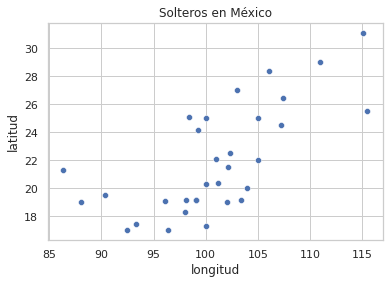

In [119]:
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title("Solteros en México")
ax.set_ylabel('latitud')
ax.set_xlabel('longitud')

sns.scatterplot(y=df_estados['latitud'],x=df_estados['longitud'],ax=ax)

In [120]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=10,max_iter=10000)
k_means.fit(df_estados[['latitud','longitud']]);
clasificaciones = k_means.predict(df_estados[['latitud','longitud']])

In [121]:
centers = k_means.cluster_centers_
centers

array([[ 26.264     , 105.726     ],
       [ 18.46714286,  98.12      ],
       [ 31.1       , 115.12      ],
       [ 20.035     , 103.6075    ],
       [ 17.98333333,  92.02333333],
       [ 24.74666667,  99.20333333],
       [ 20.15      ,  87.15      ],
       [ 29.        , 111.        ],
       [ 21.364     , 101.332     ],
       [ 25.5       , 115.5       ]])

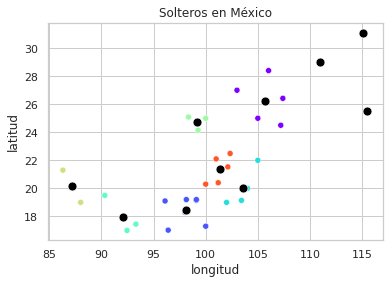

In [122]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title("Solteros en México")
ax.set_ylabel('latitud')
ax.set_xlabel('longitud')

sns.scatterplot(y=df_estados['latitud'],x=df_estados['longitud'],ax=ax,hue=clasificaciones,palette='rainbow')
sns.scatterplot(y=centers[:,0],x=centers[:,1],ax=ax,s=80,color='black')
ax.get_legend().remove()